# PHYSICS 334 Assignment 3 2019

This assignment should be handed in via upload of your python notebook, containing numbered answers to the questions handed out on the Assignment sheet, to Canvas before 12 noon on Wednesday 25 April.

In this assignment, we are going to use several python scripts that are available from the authors of the well known book, "Computer Simulation of Liquids" by M. P. Allen and D. Tildesley, originally published by Oxford University Press in 1987. They demonstrate many key algorithms that are foundational to simulation of periodic systems, and have been rereleased in python form for the 2nd edition of the book, which came out in August 2017.

The Python code from Allen & Tildesley is great, but it has a few quirks. One is that, since it has been adapted from Fortran, it is a bit funny about how you give it inputs. We will need to write an input file for each piece of code to read in.

As you go through the cells in the notebook below, you will need to run the code (shift-return will do this). You should add markdown text (like this text!) in a cell above the code to explain any changes you have made; you should add markdown text in a cell following the code to discuss the results and answer the assignment questions.

# Question 1

To create a physical system of atoms for your simulation, you will first work with the code 'initialize.py'.

To begin with, we will simulate 'Lennard-Jones atoms', which are defined such that the energy scale of the potential describing the interaction between the atoms is normalised to 1. Later, by changing the parameters of the potential, we will be able to change our simulation to mimic a given physical system.

First we write the input file that *initialize.py* will use. We want it to give us an initial configuration with both positions and velocities. (It sets up a configuration for 256 atoms by default.) 

In [1]:
with open("input.inp",'w') as input_file:
    input_file.write('{"velocities":true}')

You want to run initialize.py with input "velocities":true, to create velocity information for each atom which reflects the temperature.  To do this we put this information in an input file 'input.inp' which the code reads. This runs the code with no 'new' input, just using the default information.  

Run *initialize.py*. It will output a file called cnf.inp

If you look at cnf.inp in your library you will see it contains '256' and '6.988...' on the first two lines, for the number of atoms and the box length. Then there are 256 lines containing six numbers - these are the x,y,z coordinates of each atom, followed by the x,y,z components of the velocities of each atom.  These are randomly generated to give a distribution that equates to a given temperature (by default, T = 1.0 in Lennard Jones units).

So your configuration file will contain the positions and velocities of 256 atoms in a FCC lattice, with reduced density = 0.75 and reduced temperature T = 1.0, and we can use this for a MC simulation.


In [2]:
%run initialize

initialize
Sets up initial configuration file for various simulations
Options for molecules are "atom", "linear", "nonlinear", "chain"
Particle mass m=1 throughout
Periodic boundaries
Atoms
nc                                                    4
n                                                   256
Velocities option selected
Periodic boundary conditions
Density                                        0.750000
Box length                                     6.988644
Close-packed fcc lattice positions
Temperature                                    1.000000
Velocities at temperature, inertia             1.000000       1.000000
Writing configuration to filename cnf.inp


Next we need to write an input file with some parameters for *mc_nvt_lj.py*. We might start by specifying a simulation that uses 10 blocks, each of 100 steps, for an unscaled temperature (temperature = 1 unit of T).

In [1]:
with open("run_input.inp",'w') as run_file:
    #run_file.write('{}')
    run_file.write('{ "nblock":1, "nstep":5, "temperature":1.0 }')

This version of *mc_nvt_lj.py* reads in the input file produced above. Time to run it...

In [4]:
%run mc_nvt_lj

mc_nvt_lj
Monte Carlo, constant-NVT ensemble
Simulation uses cut (but not shifted) potential
Lennard-Jones potential
Cut (but not shifted)
Diameter, sigma = 1
Well depth, epsilon = 1
Fast NumPy potential routine
Number of blocks                                     10  
Number of steps per block                           100  
Specified temperature                          1.000000
Potential cutoff distance                      2.500000
Maximum displacement                           0.150000
Number of particles                                 256  
Box length                                     6.988644
Density                                        0.750000
Initial values
E/N cut                                       -4.358403
P cut                                         -5.459551
E/N full                                      -4.759978
P full                                        -5.760732
T config                                       0.000000

Run begins
Date:                      

Looking at the output, we see several things. Each block of the simulation reports thermodynamic quantities, such as E/N, and these are averaged at the end over all blocks.  Both E/N and P are calculated first with a truncated LJ potential (cut) and an extended version (full).  You should work with the 'full' results.

Now I would like you to test how the calculated energies change depending on the number of steps, and number of blocks used.  

Recalculate, as above, increasing the number of blocks and number of steps systematically until you can demonstrate that the energy per atom has converged to two decimal places, in reduced units.  To do this, please plot E/N against the number of steps multiplied by the number of blocks (the total number of steps).  Does it make a difference whether you have more or fewer blocks, for a given total number of steps? Discuss your results.

A piece of python code that you can use to plot xy data is below - modify this to demonstrate the convergence of the energy that you find.




.

The following code writes the input file for mc_nvt_lj.py for values in a range as described at the start of the for loop. The first range means that the number of blocks is varying between 2 and 30 in steps of 2. For each number of blocks, mc_nvt_lj.py has been run. The results are printed below the input. Temperature is always at 1.0 in Leonnard Jones units and the number of steps in each block remains constant at 100. 
The second input below is used to read the results. This means that the results we are interested in can be used in plots later in the assignment. 

In [5]:
with open("input.inp",'w') as input_file:
    input_file.write('{"velocities":true}')
%run initialize

xblock = np.arange(2, 30, 2)
for i in xblock:
    with open("run_input.inp",'w') as run_file:
        run_file.write('{ "nblock":'+str(i)+', "nstep":100, "temperature":1.0 }')
    %run mc_nvt_lj

initialize
Sets up initial configuration file for various simulations
Options for molecules are "atom", "linear", "nonlinear", "chain"
Particle mass m=1 throughout
Periodic boundaries
Atoms
nc                                                    4
n                                                   256
Velocities option selected
Periodic boundary conditions
Density                                        0.750000
Box length                                     6.988644
Close-packed fcc lattice positions
Temperature                                    1.000000
Velocities at temperature, inertia             1.000000       1.000000
Writing configuration to filename cnf.inp
mc_nvt_lj
Monte Carlo, constant-NVT ensemble
Simulation uses cut (but not shifted) potential
Lennard-Jones potential
Cut (but not shifted)
Diameter, sigma = 1
Well depth, epsilon = 1
Fast NumPy potential routine
Number of blocks                                      2  
Number of steps per block                           100 

              1        0.429297       -3.522525       -0.536396       -3.924100       -0.837577        0.965495        6.491968
              2        0.381133       -3.365410        0.478044       -3.766985        0.176863        0.996426        2.638085
              3        0.373320       -3.339428        0.546985       -3.741002        0.245804        0.967872        1.913754
              4        0.374453       -3.316736        0.634576       -3.718311        0.333395        1.008657        2.201342
              5        0.378477       -3.344299        0.635260       -3.745874        0.334079        0.957157        2.017605
              6        0.392539       -3.378788        0.404517       -3.780363        0.103336        0.980462        2.286574
-------------------------------------------------------------------------------------------------------------------------------
   Run averages        0.388203       -3.377864        0.360498       -3.779439        0.059317        0

             10        0.376680       -3.299708        0.791063       -3.701283        0.489882        1.014133        2.531080
-------------------------------------------------------------------------------------------------------------------------------
   Run averages        0.382508       -3.343577        0.569185       -3.745152        0.268004        0.993316        2.674642
     Run errors        0.004244        0.015282        0.093234        0.015282        0.093234        0.007221        0.464162

Run ends
Date:                                        2019/04/26
Time:                                          01:24:47
CPU time:                                    334.576599

Final values
E/N cut                                       -3.175936
P cut                                          1.246782
E/N full                                      -3.577511
P full                                         0.945601
T config                                       1.239583
Program ends
mc_

             11        0.378828       -3.327783        0.649778       -3.729358        0.348597        1.025470        2.459430
             12        0.381680       -3.316827        0.680366       -3.718402        0.379185        1.005417        1.950186
             13        0.383242       -3.363503        0.448450       -3.765078        0.147269        0.972668        2.084618
             14        0.381406       -3.310224        0.707467       -3.711799        0.406285        1.025467        2.288732
-------------------------------------------------------------------------------------------------------------------------------
   Run averages        0.379495       -3.341710        0.589224       -3.743285        0.288043        0.992772        2.539638
     Run errors        0.002552        0.010231        0.063223        0.010231        0.063223        0.004896        0.382090

Run ends
Date:                                        2019/04/26
Time:                                 

              4        0.374336       -3.292620        0.825781       -3.694195        0.524600        1.003627        1.935255
              5        0.373984       -3.308923        0.737626       -3.710498        0.436445        0.991371        2.432591
              6        0.384336       -3.334534        0.589835       -3.736109        0.288654        0.986366        1.944980
              7        0.388086       -3.361687        0.447572       -3.763262        0.146391        0.966637        1.926243
              8        0.370039       -3.311982        0.829821       -3.713557        0.528640        0.988032        2.141291
              9        0.376875       -3.321887        0.704529       -3.723462        0.403348        1.002003        2.101113
             10        0.372070       -3.343547        0.670657       -3.745121        0.369476        0.973031        2.265380
             11        0.383672       -3.356537        0.571982       -3.758112        0.270801        1

              1        0.421445       -3.521215       -0.492765       -3.922790       -0.793946        0.950540        6.482004
              2        0.380000       -3.335334        0.626214       -3.736909        0.325033        0.998900        2.055252
              3        0.372188       -3.300157        0.754316       -3.701732        0.453135        1.014115        2.014039
              4        0.378281       -3.333500        0.658074       -3.735074        0.356893        0.996210        2.091072
              5        0.378984       -3.318880        0.666155       -3.720455        0.364973        0.989268        2.564087
              6        0.379961       -3.373053        0.428269       -3.774628        0.127087        0.942144        1.981196
              7        0.380898       -3.343616        0.548619       -3.745191        0.247438        0.982378        2.323500
              8        0.386211       -3.344999        0.598690       -3.746573        0.297509        0

             23        0.378828       -3.327746        0.673967       -3.729321        0.372785        0.984274        2.141230
             24        0.378750       -3.332599        0.686388       -3.734174        0.385207        1.012505        2.213995
-------------------------------------------------------------------------------------------------------------------------------
   Run averages        0.381034       -3.341743        0.582285       -3.743318        0.281104        0.996072        2.421518
     Run errors        0.002108        0.007957        0.047076        0.007957        0.047076        0.003696        0.207587

Run ends
Date:                                        2019/04/26
Time:                                          01:42:46
CPU time:                                   1392.461790

Final values
E/N cut                                       -3.331262
P cut                                          0.742983
E/N full                                      -3.732837


              1        0.423594       -3.494367       -0.324851       -3.895942       -0.626032        0.980801        7.366938
              2        0.380117       -3.347082        0.590674       -3.748657        0.289493        1.003771        2.204559
              3        0.385078       -3.354548        0.512865       -3.756123        0.211684        0.990333        2.062347
              4        0.372227       -3.335872        0.683445       -3.737447        0.382264        0.981307        2.020720
              5        0.384102       -3.336661        0.559252       -3.738236        0.258071        0.986517        2.083372
              6        0.381875       -3.343909        0.571813       -3.745484        0.270632        0.992226        2.083187
              7        0.370273       -3.299837        0.774643       -3.701412        0.473461        1.017090        1.958600
              8        0.385391       -3.324359        0.663351       -3.725934        0.362170        1

In [7]:
import os, io, sys
from nbformat import read

def read_notebook(fname):
    """display a short summary of the cells of a notebook"""
    with io.open(fname, 'r', encoding='utf-8') as f:
        nb = read(f, 4)
    return nb.cells
read = read_notebook('Assignment3-FinalCopy.ipynb')

results = np.array([])
resultsunc = np.array([])
for i in range(0, len(read[16].outputs)):
    sets = read[16].outputs[i].text.split('\n')
    resulti = [float(line.split('       ')[-4]) for line in sets if line[:15] == '   Run averages']
    resulti = np.array(resulti)
    results = np.append(results, resulti)
    
    resultiunc = [float(line.split('       ')[-4]) for line in sets if line[:15] == '     Run errors']
    resultiunc = np.array(resultiunc)
    resultsunc = np.append(resultsunc, resultiunc)
EN16 = results
EN16unc = resultsunc
print(EN16)
print(EN16unc)

[-3.843854 -3.766951 -3.779439 -3.762434 -3.745152 -3.760763 -3.743285
 -3.753758 -3.742059 -3.743196 -3.745082 -3.743318 -3.747753 -3.742016]
[0.04005  0.030856 0.0276   0.024914 0.015282 0.016079 0.010231 0.011583
 0.010786 0.01069  0.009836 0.007957 0.008474 0.00662 ]


The range in the following input means that the number of steps is varying between 10 and 300 in each block. For each number of steps, mc_nvt_lj.py has been run. The results are printed below the input. Temperature is always at 1.0 in Leonnard Jones units and the number of blocks remains constant at 10.
The results are again read and saved for plots later in the assignment.

In [8]:
with open("input.inp",'w') as input_file:
    input_file.write('{"velocities":true}')
%run initialize

xstep = np.arange(10, 300, 10)
for i in xstep:
    with open("run_input.inp",'w') as run_file:
        run_file.write('{ "nblock":10, "nstep":'+str(i)+', "temperature":1.0 }')
    %run mc_nvt_lj

initialize
Sets up initial configuration file for various simulations
Options for molecules are "atom", "linear", "nonlinear", "chain"
Particle mass m=1 throughout
Periodic boundaries
Atoms
nc                                                    4
n                                                   256
Velocities option selected
Periodic boundary conditions
Density                                        0.750000
Box length                                     6.988644
Close-packed fcc lattice positions
Temperature                                    1.000000
Velocities at temperature, inertia             1.000000       1.000000
Writing configuration to filename cnf.inp
mc_nvt_lj
Monte Carlo, constant-NVT ensemble
Simulation uses cut (but not shifted) potential
Lennard-Jones potential
Cut (but not shifted)
Diameter, sigma = 1
Well depth, epsilon = 1
Fast NumPy potential routine
Number of blocks                                     10  
Number of steps per block                            10 

Program ends
mc_nvt_lj
Monte Carlo, constant-NVT ensemble
Simulation uses cut (but not shifted) potential
Lennard-Jones potential
Cut (but not shifted)
Diameter, sigma = 1
Well depth, epsilon = 1
Fast NumPy potential routine
Number of blocks                                     10  
Number of steps per block                            30  
Specified temperature                          1.000000
Potential cutoff distance                      2.500000
Maximum displacement                           0.150000
Number of particles                                 256  
Box length                                     6.988644
Density                                        0.750000
Initial values
E/N cut                                       -4.358403
P cut                                         -5.459551
E/N full                                      -4.759978
P full                                        -5.760732
T config                                       0.000000

Run begins
Date:         

Number of particles                                 256  
Box length                                     6.988644
Density                                        0.750000
Initial values
E/N cut                                       -4.358403
P cut                                         -5.459551
E/N full                                      -4.759978
P full                                        -5.760732
T config                                       0.000000

Run begins
Date:                                        2019/04/26
Time:                                          02:01:06
CPU time:                                   1926.341124

          Block            Move             E/N               P             E/N               P               T            Cv/N
                          ratio             cut             cut            full            full          config            full
--------------------------------------------------------------------------------------------------

              1        0.438225       -3.578486       -0.804690       -3.980061       -1.105871        0.907414        6.165251
              2        0.395033       -3.444590        0.040086       -3.846165       -0.261095        0.981495        2.146958
              3        0.386217       -3.358772        0.466021       -3.760347        0.164840        0.971644        1.827711
              4        0.379799       -3.359157        0.533190       -3.760731        0.232009        1.000943        1.912372
              5        0.378516       -3.339731        0.662340       -3.741306        0.361159        0.976327        2.151979
              6        0.380580       -3.326545        0.629466       -3.728120        0.328285        0.983609        2.021872
              7        0.377121       -3.299963        0.721601       -3.701538        0.420420        0.980264        2.062146
              8        0.382143       -3.319732        0.579599       -3.721307        0.278418        0

              4        0.384635       -3.372734        0.538291       -3.774309        0.237110        0.988942        2.023944
              5        0.381771       -3.355551        0.517286       -3.757126        0.216105        0.959469        2.569448
              6        0.373003       -3.315153        0.802786       -3.716728        0.501604        0.975396        2.053043
              7        0.365278       -3.273272        0.936396       -3.674847        0.635214        1.035615        2.026432
              8        0.374523       -3.342311        0.672972       -3.743886        0.371791        0.998776        2.094070
              9        0.375130       -3.339866        0.690646       -3.741441        0.389465        0.977810        2.359079
             10        0.382292       -3.349078        0.550910       -3.750653        0.249728        0.984435        2.073755
--------------------------------------------------------------------------------------------------------

              7        0.375391       -3.347224        0.583628       -3.748799        0.282447        0.967220        2.291505
              8        0.379155       -3.329808        0.658218       -3.731382        0.357037        1.000217        2.053337
              9        0.373793       -3.312202        0.718350       -3.713777        0.417169        0.982144        1.988007
             10        0.374716       -3.299858        0.794491       -3.701433        0.493310        0.993980        2.014432
-------------------------------------------------------------------------------------------------------------------------------
   Run averages        0.380039       -3.344501        0.580884       -3.746076        0.279703        0.983131        2.650112
     Run errors        0.003783        0.015382        0.088816        0.015382        0.088816        0.006014        0.520283

Run ends
Date:                                        2019/04/26
Time:                                 

             10        0.374189       -3.349661        0.675509       -3.751236        0.374328        0.962413        2.076854
-------------------------------------------------------------------------------------------------------------------------------
   Run averages        0.381662       -3.350804        0.539493       -3.752378        0.238312        0.989731        2.543014
     Run errors        0.003457        0.017759        0.098311        0.017759        0.098311        0.008016        0.359217

Run ends
Date:                                        2019/04/26
Time:                                          02:12:55
CPU time:                                   2620.264106

Final values
E/N cut                                       -3.410979
P cut                                          0.354708
E/N full                                      -3.812554
P full                                         0.053527
T config                                       0.939469
Program ends
mc_

Program ends
mc_nvt_lj
Monte Carlo, constant-NVT ensemble
Simulation uses cut (but not shifted) potential
Lennard-Jones potential
Cut (but not shifted)
Diameter, sigma = 1
Well depth, epsilon = 1
Fast NumPy potential routine
Number of blocks                                     10  
Number of steps per block                           160  
Specified temperature                          1.000000
Potential cutoff distance                      2.500000
Maximum displacement                           0.150000
Number of particles                                 256  
Box length                                     6.988644
Density                                        0.750000
Initial values
E/N cut                                       -4.358403
P cut                                         -5.459551
E/N full                                      -4.759978
P full                                        -5.760732
T config                                       0.000000

Run begins
Date:         

              1        0.410135       -3.463033       -0.065928       -3.864608       -0.367109        0.983149        6.208977
              2        0.382465       -3.348047        0.573866       -3.749622        0.272685        0.978192        2.061809
              3        0.383767       -3.361781        0.530658       -3.763356        0.229477        0.980212        2.026914
              4        0.379145       -3.319375        0.621713       -3.720949        0.320531        1.009804        2.081718
              5        0.382661       -3.349528        0.470954       -3.751103        0.169773        0.974707        2.023873
              6        0.381814       -3.331848        0.630156       -3.733423        0.328975        0.982966        2.171206
              7        0.376931       -3.340142        0.648653       -3.741717        0.347472        1.012825        2.246590
              8        0.378212       -3.335319        0.635187       -3.736894        0.334006        0

              4        0.377441       -3.322139        0.691242       -3.723714        0.390061        1.020571        2.072015
              5        0.374258       -3.301854        0.828751       -3.703429        0.527570        0.995708        1.983474
              6        0.379551       -3.324891        0.697145       -3.726466        0.395964        1.010264        2.281810
              7        0.371250       -3.309974        0.790868       -3.711549        0.489687        1.003775        1.902857
              8        0.378223       -3.332274        0.613102       -3.733849        0.311920        1.010325        2.418490
              9        0.376387       -3.319325        0.723920       -3.720900        0.422739        1.015202        2.119269
             10        0.373418       -3.322669        0.782364       -3.724244        0.481183        1.010475        1.994628
--------------------------------------------------------------------------------------------------------

              7        0.377184       -3.326315        0.660269       -3.727890        0.359088        0.977781        2.052260
              8        0.379244       -3.346333        0.639369       -3.747908        0.338187        0.970887        1.924101
              9        0.379776       -3.348613        0.560273       -3.750188        0.259092        0.979042        2.087610
             10        0.376847       -3.320214        0.652770       -3.721789        0.351588        1.012772        2.095358
-------------------------------------------------------------------------------------------------------------------------------
   Run averages        0.380405       -3.344063        0.577148       -3.745637        0.275967        0.991424        2.476770
     Run errors        0.002044        0.008995        0.053846        0.008995        0.053846        0.004845        0.365776

Run ends
Date:                                        2019/04/26
Time:                                 

             10        0.381429       -3.341693        0.578707       -3.743268        0.277526        0.987138        2.101613
-------------------------------------------------------------------------------------------------------------------------------
   Run averages        0.379455       -3.342798        0.605721       -3.744373        0.304540        0.989081        2.561572
     Run errors        0.002315        0.008260        0.053061        0.008260        0.053061        0.003145        0.333800

Run ends
Date:                                        2019/04/26
Time:                                          02:42:55
CPU time:                                   4401.926040

Final values
E/N cut                                       -3.303838
P cut                                          0.701261
E/N full                                      -3.705413
P full                                         0.400080
T config                                       1.035564
Program ends
mc_

Program ends
mc_nvt_lj
Monte Carlo, constant-NVT ensemble
Simulation uses cut (but not shifted) potential
Lennard-Jones potential
Cut (but not shifted)
Diameter, sigma = 1
Well depth, epsilon = 1
Fast NumPy potential routine
Number of blocks                                     10  
Number of steps per block                           270  
Specified temperature                          1.000000
Potential cutoff distance                      2.500000
Maximum displacement                           0.150000
Number of particles                                 256  
Box length                                     6.988644
Density                                        0.750000
Initial values
E/N cut                                       -4.358403
P cut                                         -5.459551
E/N full                                      -4.759978
P full                                        -5.760732
T config                                       0.000000

Run begins
Date:         

              1        0.403179       -3.409900        0.123908       -3.811475       -0.177273        0.986710        5.297651
              2        0.375013       -3.316510        0.650644       -3.718085        0.349463        0.993648        2.133302
              3        0.382085       -3.350286        0.548906       -3.751860        0.247725        0.984152        2.143902
              4        0.378273       -3.327650        0.625072       -3.729225        0.323891        0.996804        2.220379
              5        0.373855       -3.333273        0.683229       -3.734848        0.382048        1.008857        2.262642
              6        0.378852       -3.350378        0.591110       -3.751953        0.289929        0.998883        2.252572
              7        0.378058       -3.335752        0.607223       -3.737327        0.306042        0.991373        2.274554
              8        0.374515       -3.323575        0.756151       -3.725150        0.454970        0

In [18]:
import os, io, sys
from nbformat import read

def read_notebook(fname):
    """display a short summary of the cells of a notebook"""
    with io.open(fname, 'r', encoding='utf-8') as f:
        nb = read(f, 4)
    return nb.cells
read = read_notebook('Assignment3-FinalCopy.ipynb')

results = np.array([])
resultsunc = np.array([])
for i in range(0, len(read[19].outputs)):
    sets = read[19].outputs[i].text.split('\n')
    resulti = [float(line.split('       ')[-4]) for line in sets if line[:15] == '   Run averages']
    resulti = np.array(resulti)
    results = np.append(results, resulti)
    
    resultiunc = [float(line.split('       ')[-4]) for line in sets if line[:15] == '     Run errors']
    resultiunc = np.array(resultiunc)
    resultsunc = np.append(resultsunc, resultiunc)
EN19 = results
EN19unc = resultsunc
print(EN19)
print(EN19unc)

[-3.918204 -3.815926 -3.808023 -3.801565 -3.772665 -3.755941 -3.765632
 -3.765054 -3.760354 -3.758096 -3.746076 -3.750776 -3.752378 -3.74683
 -3.744364 -3.750836 -3.736324 -3.752113 -3.732583 -3.735677 -3.733517
 -3.745637 -3.738296 -3.744373 -3.745826 -3.73591  -3.744403 -3.742692
 -3.74454 ]
[0.039354 0.037221 0.028622 0.024795 0.026763 0.025404 0.026116 0.020922
 0.017422 0.01401  0.015382 0.013444 0.017759 0.015181 0.014875 0.015172
 0.013241 0.01251  0.011996 0.009628 0.010458 0.008995 0.008385 0.00826
 0.008248 0.010534 0.007534 0.009219 0.007968]


The resulting values from the previous 2 inputs, can be plotted as shown by the following output. The values were read and copied directly from the previous outputs and saved as values in the y direction. These values were then plotted comparing when the number of blocks varies, when the number of steps varies and both sets combined.

Text(0.5,1,'Varying both the number of blocks and steps')

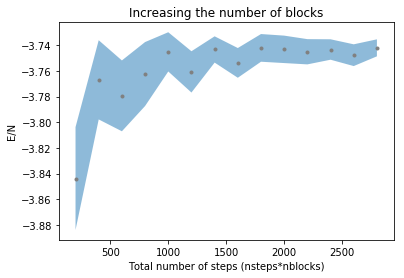

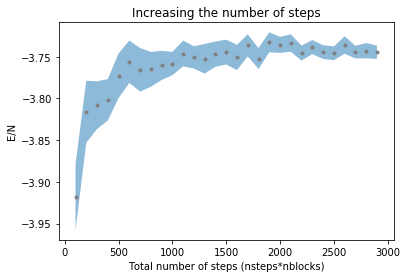

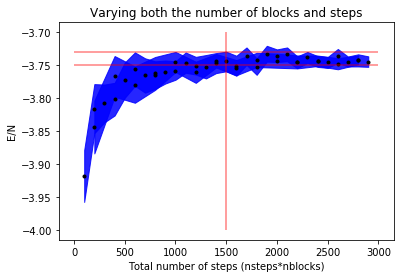

In [23]:
import matplotlib.pyplot as plt
import numpy as np

x1 = 100*xblock
y1 = np.array(EN16)
y1unc = np.array(EN16unc)

plt.figure()
plt.fill_between(x1, (np.add(y1,y1unc)), (np.subtract(y1, y1unc)), alpha=0.5)
plt.scatter(x1, y1, color='gray', marker='.')
plt.ylabel('E/N')
plt.xlabel('Total number of steps (nsteps*nblocks)')
plt.title('Increasing the number of blocks')

x2 = 10*xstep
y2 = np.array(EN19)
y2unc = np.array(EN19unc)

plt.figure()
plt.fill_between(x2, (np.add(y2,y2unc)), (np.subtract(y2, y2unc)), alpha=0.5)
plt.scatter(x2,y2, color='gray', marker='.')
plt.ylabel('E/N')
plt.xlabel('Total number of steps (nsteps*nblocks)')
plt.title('Increasing the number of steps')

X = np.append(x1, x2)
Y = np.append(y1, y2)
Yunc = np.append(y1unc, y2unc)
Yplus = (np.add(Y, Yunc))
Yminus = (np.subtract(Y, Yunc))

plt.figure()
plt.fill_between(x1, (np.add(y1,y1unc)), (np.subtract(y1, y1unc)), alpha=0.85, color='blue')
plt.fill_between(x2, (np.add(y2,y2unc)), (np.subtract(y2, y2unc)), alpha=0.85, color='blue')
plt.scatter(X, Y, color='black', marker='.')
plt.hlines(-3.75, 0, 3000, color='red', alpha=0.5)
plt.hlines(-3.73, 0, 3000, color='red', alpha=0.5)
plt.vlines(1500, -4, -3.7, color='red', alpha=0.5)
plt.ylabel('E/N')
plt.xlabel('Total number of steps (nsteps*nblocks)')
plt.title('Varying both the number of blocks and steps')

The final result is always the average of the blocks where the result of each block is the average of the steps within the block, hence the final result is roughly the same as taking the average from all of the steps combined. This is clarifed by the plots above, where the results appear to follow the same trend irrespective of whether it is the number of steps within a block that is varied or the number of steps varied. 

The horizontal lines in the third plot with all of the data combined sit at -3.75 and -3.73. As seen in the plot, once the data reaches 1500 steps overall (the vertical red line), it sits between the two horizontal red lines. This means that it is possible to say that as the number of steps increases past 1500, the energy per atom has converged to two decimal places, sitting between -3.75 and -3.73.

## Question 2

Plot E/N vs T for ten temperatures from 0.01 to 1.0 - and discuss!

The range in the following input means that the temperature is varying between 0.01 and 1.0 in steps of 0.099. For each temperature, mc_nvt_lj.py has been run. The results are printed below the input. The number of blocks remains constant at 10 and the number of steps in each block remains constant at 100.

The results have then been read and relevant data retrieved by the following code. In order to plot the data collected, the third input code was used. The output graphs have been discussed and adapted below this.

In [1]:
import numpy as np

with open("input.inp",'w') as input_file:
    input_file.write('{"velocities":true}')
%run initialize

Tset = np.arange(0.01, 1.0, 0.099)
for i in Tset:
    with open("run_input.inp",'w') as run_file:
        run_file.write('{ "nblock":15, "nstep":100, "temperature":'+str(i)+' }')
    %run mc_nvt_lj

initialize
Sets up initial configuration file for various simulations
Options for molecules are "atom", "linear", "nonlinear", "chain"
Particle mass m=1 throughout
Periodic boundaries
Atoms
nc                                                    4
n                                                   256
Velocities option selected
Periodic boundary conditions
Density                                        0.750000
Box length                                     6.988644
Close-packed fcc lattice positions
Temperature                                    1.000000
Velocities at temperature, inertia             1.000000       1.000000
Writing configuration to filename cnf.inp
mc_nvt_lj
Monte Carlo, constant-NVT ensemble
Simulation uses cut (but not shifted) potential
Lennard-Jones potential
Cut (but not shifted)
Diameter, sigma = 1
Well depth, epsilon = 1
Fast NumPy potential routine
Number of blocks                                     15  
Number of steps per block                           100 

             12        0.037227       -6.244768       -2.024693       -6.646343       -2.325874        0.118437        2.270947
             13        0.038555       -6.245209       -1.965370       -6.646784       -2.266551        0.118661        1.878041
             14        0.031953       -6.260414       -2.021189       -6.661989       -2.322370        0.108026        2.419600
             15        0.034805       -6.270000       -2.021645       -6.671575       -2.322826        0.105147        1.835914
-------------------------------------------------------------------------------------------------------------------------------
   Run averages        0.057773       -6.078132       -2.697231       -6.479706       -2.998412        0.113931       12.087209
     Run errors        0.009867        0.053794        0.214464        0.053794        0.214464        0.001517        4.663715

Run ends
Date:                                        2019/04/26
Time:                                 

              5        0.192500       -5.299012       -2.309919       -5.700587       -2.611100        0.306478        2.238982
              6        0.180625       -5.352884       -2.123182       -5.754459       -2.424363        0.298746        3.288388
              7        0.178242       -5.378805       -2.087185       -5.780380       -2.388366        0.305964        2.825448
              8        0.166680       -5.411847       -1.921735       -5.813422       -2.222916        0.306907        2.108886
              9        0.159023       -5.447852       -1.810621       -5.849427       -2.111802        0.298851        5.370383
             10        0.161328       -5.473461       -1.865161       -5.875036       -2.166342        0.298913        2.563795
             11        0.161836       -5.494998       -1.720406       -5.896573       -2.021587        0.311904        2.430189
             12        0.155664       -5.509850       -1.753390       -5.911425       -2.054571        0

              1        0.355391       -4.642028       -2.703826       -5.043603       -3.005008        0.471724        5.623029
              2        0.308672       -4.563202       -1.974050       -4.964777       -2.275231        0.478404        3.313413
              3        0.297930       -4.501448       -1.544468       -4.903023       -1.845649        0.503272        2.116005
              4        0.291602       -4.481352       -1.401848       -4.882927       -1.703029        0.521490        2.219269
              5        0.294180       -4.513770       -1.591116       -4.915345       -1.892298        0.490268        2.009217
              6        0.298320       -4.505568       -1.575272       -4.907143       -1.876454        0.517439        2.041690
              7        0.300742       -4.497147       -1.531989       -4.898722       -1.833170        0.513742        2.104998
              8        0.291094       -4.481990       -1.404286       -4.883565       -1.705467        0

              1        0.384141       -4.156704       -1.603613       -4.558279       -1.904794        0.684864        6.987133
              2        0.341992       -4.052960       -0.865098       -4.454535       -1.166279        0.697901        1.990946
              3        0.338789       -4.038517       -0.737944       -4.440092       -1.039126        0.707480        2.009348
              4        0.330117       -4.025324       -0.565326       -4.426899       -0.866507        0.677875        2.188323
              5        0.331562       -3.993624       -0.519075       -4.395199       -0.820256        0.700461        2.143870
              6        0.336289       -4.005455       -0.571003       -4.407030       -0.872184        0.703946        3.616054
              7        0.343203       -4.022208       -0.738591       -4.423782       -1.039772        0.700071        2.239176
              8        0.338164       -3.999018       -0.593478       -4.400593       -0.894659        0

              1        0.417773       -3.727757       -0.814934       -4.129331       -1.116115        0.851955        6.107176
              2        0.377617       -3.596609        0.052484       -3.998184       -0.248697        0.899922        2.176388
              3        0.378633       -3.572062        0.126608       -3.973637       -0.174573        0.935441        2.242618
              4        0.371758       -3.560833        0.177701       -3.962408       -0.123480        0.911335        2.275206
              5        0.370469       -3.550766        0.265618       -3.952341       -0.035563        0.886805        2.440203
              6        0.368672       -3.595194        0.008063       -3.996769       -0.293118        0.854640        2.109330
              7        0.369414       -3.555941        0.228930       -3.957516       -0.072251        0.926256        2.441359
              8        0.370586       -3.554479        0.252271       -3.956054       -0.048910        0

In [2]:
import os, io, sys
from nbformat import read

def read_notebook(fname):
    """display a short summary of the cells of a notebook"""
    with io.open(fname, 'r', encoding='utf-8') as f:
        nb = read(f, 4)
    return nb.cells
read = read_notebook('Assignment3-FinalCopy.ipynb')

results = np.array([])
resultsunc = np.array([])
for i in range(0, len(read[27].outputs)):
    sets = read[27].outputs[i].text.split('\n')
    resulti = [float(line.split('       ')[-4]) for line in sets if line[:15] == '   Run averages']
    resulti = np.array(resulti)
    results = np.append(results, resulti)
    
    resultiunc = [float(line.split('       ')[-4]) for line in sets if line[:15] == '     Run errors']
    resultiunc = np.array(resultiunc)
    resultsunc = np.append(resultsunc, resultiunc)
EN27 = results
EN27unc = resultsunc
print(EN27)
print(EN27unc)

results = np.array([])
resultsunc = np.array([])
for i in range(0, len(read[27].outputs)):
    sets = read[27].outputs[i].text.split('\n')
    resulti = [float(line.split('       ')[-1]) for line in sets if line[:15] == '   Run averages']
    resulti = np.array(resulti)
    results = np.append(results, resulti)
    
    resultiunc = [float(line.split('       ')[-1]) for line in sets if line[:15] == '     Run errors']
    resultiunc = np.array(resultiunc)
    resultsunc = np.append(resultsunc, resultiunc)
CN27 = results
CN27unc = resultsunc
print(CN27)
print(CN27unc)

[-6.237675 -6.479706 -6.157912 -5.766704 -5.387941 -4.916335 -4.679421
 -4.425972 -4.211427 -3.972232]
[0.000638 0.053794 0.047286 0.044286 0.034987 0.010049 0.007953 0.010491
 0.009738 0.012131]
[ 1.789007 12.087209  4.569435  3.29306   2.779695  2.549656  2.650831
  2.601949  2.549974  2.450394]
[0.093712 4.663715 0.725921 0.416656 0.24419  0.228723 0.4469   0.32165
 0.33381  0.256712]


Text(0.5,0,'Temperature')

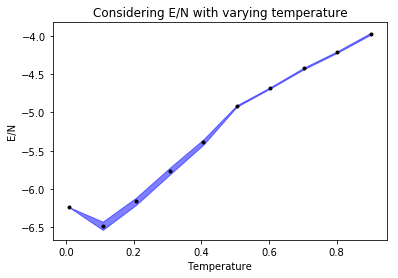

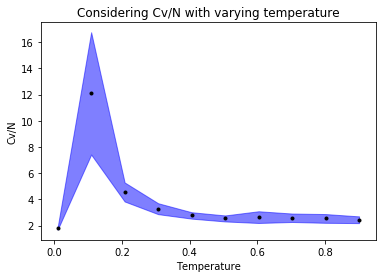

In [4]:
import matplotlib.pyplot as plt
X = Tset
E = np.array(EN27)
Eunc = np.array(EN27unc)
C = np.array(CN27)
Cunc = np.array(CN27unc)

plt.figure()
plt.title('Considering E/N with varying temperature')
plt.fill_between(X, (np.add(E,Eunc)), (np.subtract(E, Eunc)), alpha=0.5, color='blue')
plt.scatter(X, E, color='black', marker='.')
plt.ylabel('E/N')
plt.xlabel('Temperature')

plt.figure()
plt.title('Considering Cv/N with varying temperature')
plt.fill_between(X, (np.add(C,Cunc)), (np.subtract(C, Cunc)), alpha=0.5, color='blue')
plt.scatter(X, C, color='black', marker='.')
plt.ylabel('Cv/N')
plt.xlabel('Temperature')

As seen in the graphs above, the energy per atom appears to increase quickly at low temperatures before shifting to a linear trend at roughly 0.4. There also appears to be a peak in the plot of the variation of specific heat per atom at constant volume with varying temperature. This peak seems to sit somewhere between 0 and 0.2. For this reason, more data was collected below, specifically at lower temperatures. The newly collected data will be used to identify the melting point of the system.

In [11]:
import numpy as np

with open("input.inp",'w') as input_file:
    input_file.write('{"velocities":true}')
%run initialize

Tset2 = np.append(np.arange(0.016, 0.03, 0.002), np.arange(0.03, 0.524, 0.084))
for i in Tset2:
    with open("run_input.inp",'w') as run_file:
        run_file.write('{ "nblock":15, "nstep":100, "temperature":'+str(i)+' }')
    %run mc_nvt_lj

initialize
Sets up initial configuration file for various simulations
Options for molecules are "atom", "linear", "nonlinear", "chain"
Particle mass m=1 throughout
Periodic boundaries
Atoms
nc                                                    4
n                                                   256
Velocities option selected
Periodic boundary conditions
Density                                        0.750000
Box length                                     6.988644
Close-packed fcc lattice positions
Temperature                                    1.000000
Velocities at temperature, inertia             1.000000       1.000000
Writing configuration to filename cnf.inp
mc_nvt_lj
Monte Carlo, constant-NVT ensemble
Simulation uses cut (but not shifted) potential
Lennard-Jones potential
Cut (but not shifted)
Diameter, sigma = 1
Well depth, epsilon = 1
Fast NumPy potential routine
Number of blocks                                     15  
Number of steps per block                           100 

             12        0.015898       -5.993719       -4.474909       -6.395294       -4.776090        0.044644      157.030237
             13        0.014102       -6.036583       -4.292018       -6.438158       -4.593199        0.040767       74.440006
             14        0.013164       -6.063900       -4.069588       -6.465475       -4.370769        0.040997       42.899392
             15        0.009375       -6.086122       -3.953614       -6.487697       -4.254795        0.035691       20.430285
-------------------------------------------------------------------------------------------------------------------------------
   Run averages        0.019154       -5.884515       -5.396067       -6.286089       -5.697249        0.023463       65.124214
     Run errors        0.001764        0.026654        0.207855        0.026654        0.207855        0.004052       26.658567

Run ends
Date:                                        2019/04/26
Time:                                 

              5        0.035664       -5.805244       -5.574481       -6.206819       -5.875662        0.029772       35.495932
              6        0.035820       -5.850350       -5.188003       -6.251924       -5.489185        0.042528      230.908024
              7        0.027930       -5.930708       -4.668034       -6.332283       -4.969215        0.053729      292.899380
              8        0.023008       -6.030487       -4.219656       -6.432062       -4.520837        0.062269      558.484565
              9        0.018047       -6.132632       -3.870846       -6.534207       -4.172027        0.060501      245.771287
             10        0.012344       -6.200007       -3.727606       -6.601582       -4.028787        0.052820       91.645809
             11        0.012422       -6.237811       -3.558890       -6.639386       -3.860071        0.055923      105.998015
             12        0.013867       -6.301974       -3.374404       -6.703548       -3.675585        0

              1        0.020156       -5.805324       -6.102554       -6.206899       -6.403735        0.006930       20.806089
              2        0.039141       -5.784165       -5.945377       -6.185740       -6.246558        0.017053        9.432264
              3        0.046250       -5.785704       -5.641231       -6.187279       -5.942412        0.030686       32.113604
              4        0.036641       -5.848851       -5.126965       -6.250426       -5.428146        0.045505      217.637552
              5        0.026445       -5.923076       -4.682766       -6.324651       -4.983947        0.046424      131.579407
              6        0.023320       -5.985947       -4.348696       -6.387522       -4.649877        0.051077      149.602456
              7        0.018320       -6.058405       -4.002984       -6.459980       -4.304165        0.052425      175.192687
              8        0.016016       -6.118452       -3.750094       -6.520027       -4.051275        0

              1        0.028281       -5.793037       -6.057552       -6.194611       -6.358733        0.010628       39.402809
              2        0.056484       -5.765941       -5.799470       -6.167516       -6.100651        0.024785        5.420008
              3        0.052617       -5.808274       -5.265089       -6.209849       -5.566270        0.045725      253.563133
              4        0.033594       -5.914239       -4.647036       -6.315813       -4.948217        0.056840      251.045621
              5        0.023555       -6.014008       -4.111088       -6.415583       -4.412269        0.059453      217.290949
              6        0.020000       -6.093124       -3.808125       -6.494699       -4.109306        0.058563      116.140925
              7        0.016094       -6.152303       -3.583399       -6.553878       -3.884580        0.056319       55.273314
              8        0.014141       -6.187832       -3.475482       -6.589407       -3.776663        0

              1        0.247930       -5.355279       -4.320116       -5.756854       -4.621297        0.184395        6.927790
              2        0.193555       -5.429617       -3.791204       -5.831192       -4.092385        0.191607        5.098779
              3        0.154102       -5.554881       -3.179103       -5.956456       -3.480284        0.207882       29.790100
              4        0.118125       -5.739715       -2.733553       -6.141290       -3.034734        0.201725       11.890421
              5        0.100859       -5.830500       -2.169588       -6.232075       -2.470769        0.217558        5.559083
              6        0.088438       -5.930224       -1.997957       -6.331799       -2.299138        0.200935        8.216141
              7        0.086250       -5.990606       -1.822719       -6.392180       -2.123900        0.203650        3.407020
              8        0.082070       -6.042776       -1.711385       -6.444351       -2.012566        0

              1        0.317031       -4.946699       -3.297943       -5.348274       -3.599125        0.353647        7.896789
              2        0.279414       -4.950845       -2.919401       -5.352420       -3.220582        0.353888        2.510557
              3        0.261172       -4.967025       -2.524978       -5.368600       -2.826159        0.360710        2.519835
              4        0.243281       -5.002351       -2.381042       -5.403926       -2.682223        0.349249        2.055177
              5        0.241797       -5.022253       -2.241536       -5.423828       -2.542717        0.362811        2.682110
              6        0.230469       -5.035747       -2.075362       -5.437322       -2.376544        0.363425        1.973388
              7        0.213750       -5.086914       -1.878505       -5.488488       -2.179686        0.368220        5.631921
              8        0.201797       -5.149664       -1.685763       -5.551239       -1.986944        0

In [18]:
import os, io, sys
from nbformat import read

def read_notebook(fname):
    """display a short summary of the cells of a notebook"""
    with io.open(fname, 'r', encoding='utf-8') as f:
        nb = read(f, 4)
    return nb.cells
read = read_notebook('Assignment3-FinalCopy.ipynb')

results = np.array([])
resultsunc = np.array([])
for i in range(0, len(read[31].outputs)):
    sets = read[31].outputs[i].text.split('\n')
    resulti = [float(line.split('      ')[-4]) for line in sets if line[:15] == '   Run averages']
    resulti = np.array(resulti)
    results = np.append(results, resulti)
    
    resultiunc = [float(line.split('      ')[-4]) for line in sets if line[:15] == '     Run errors']
    resultiunc = np.array(resultiunc)
    resultsunc = np.append(resultsunc, resultiunc)
EN31 = results
EN31unc = resultsunc
print(EN31)
print(EN31unc)

resultsC = np.array([])
resultsuncC = np.array([])
for i in range(0, len(read[31].outputs)):
    sets = read[31].outputs[i].text.split('\n')
    resultiC = [float(line.split('      ')[-1]) for line in sets if line[:15] == '   Run averages']
    resultiC = np.array(resultiC)
    resultsC = np.append(resultsC, resultiC)
    
    resultiuncC = [float(line.split('      ')[-1]) for line in sets if line[:15] == '     Run errors']
    resultiuncC = np.array(resultiuncC)
    resultsuncC = np.append(resultsuncC, resultiuncC)
CN31 = resultsC
CN31unc = resultsuncC
print(CN31)
print(CN31unc)

[-6.255473 -6.286089 -6.421052 -6.458269 -6.404393 -6.47286  -6.394632
 -6.515923 -6.433073 -6.299189 -5.884067 -5.519429 -5.161164]
[0.02567  0.026654 0.049439 0.060806 0.035055 0.049949 0.036349 0.051099
 0.055875 0.064473 0.044908 0.030088 0.007337]
[456.871613  65.124214 103.635619 127.112957  54.213993  67.909819
  35.418105  70.083486   9.632213   6.379303   3.466207   3.23608
   2.604952]
[2.76097184e+02 2.66585670e+01 2.74656500e+01 3.78502970e+01
 2.16239750e+01 1.69559980e+01 8.23224300e+00 2.31811650e+01
 2.65779600e+00 1.74912400e+00 3.49865000e-01 3.87759000e-01
 2.34772000e-01]


X =  [0.01  0.016 0.018 0.02  0.022 0.024 0.026 0.028 0.03  0.109 0.114 0.198
 0.208 0.282 0.307 0.366 0.406 0.45  0.505 0.604 0.703 0.802 0.901]
E =  [-6.237675 -6.255473 -6.286089 -6.421052 -6.458269 -6.404393 -6.47286
 -6.394632 -6.515923 -6.479706 -6.433073 -6.299189 -6.157912 -5.884067
 -5.766704 -5.519429 -5.387941 -5.161164 -4.916335 -4.679421 -4.425972
 -4.211427 -3.972232]
C =  [  1.789007 456.871613  65.124214 103.635619 127.112957  54.213993
  67.909819  35.418105  70.083486  12.087209   9.632213   6.379303
   4.569435   3.466207   3.29306    3.23608    2.779695   2.604952
   2.549656   2.650831   2.601949   2.549974   2.450394]


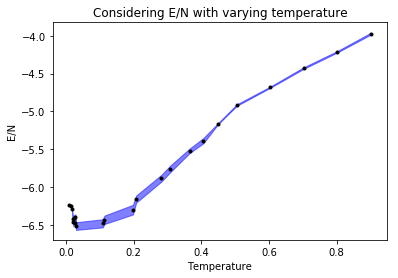

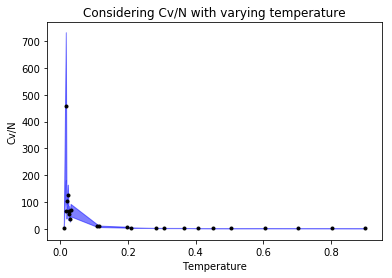

In [22]:
import matplotlib.pyplot as plt
import numpy as np
x1 = Tset
x2 = Tset2
X =np.append(x1, x2)

E1 = np.array(EN27)
Eunc1 = np.array(EN27unc)
C1 = np.array(CN27)
Cunc1 = np.array(CN27unc)

E2 = np.array(EN31)
Eunc2 = np.array(EN31unc)
C2 = np.array(CN31)
Cunc2 = np.array(CN31unc)

# Append with new results
E=np.append(E1, E2)
C=np.append(C1, C2)
Eunc=np.append(Eunc1, Eunc2)
Cunc=np.append(Cunc1, Cunc2)

Xind = np.argsort(X)
X=X[Xind]
E=E[Xind]
Eunc=Eunc[Xind]
C=C[Xind]
Cunc=Cunc[Xind]

plt.figure()
plt.title('Considering E/N with varying temperature')
plt.fill_between(X, (np.add(E, Eunc)), (np.subtract(E, Eunc)), alpha=0.5, color='blue')
plt.scatter(X, E, color='black', marker='.')
plt.ylabel('E/N')
plt.xlabel('Temperature')

plt.figure()
plt.title('Considering Cv/N with varying temperature')
plt.fill_between(X, (np.add(C,Cunc)), (np.subtract(C, Cunc)), alpha=0.5, color='blue')
plt.scatter(X, C, color='black', marker='.')
plt.ylabel('Cv/N')
plt.xlabel('Temperature')

print('X = ', X)
print('E = ', E)
print('C = ', C)

As seen in the plot of the specific heat per atom at a fixed volume, the peak sits at a temperature of about 0.016 with an uncertainty of at most 0.002 either side of this value (the distance until the next temperature measured). This is the melting point of the system. This can be identified in the plot comparing the energy per atom at different temperatures. In this plot it is where the Energy does a small drop before increasing until it settles into the linear trend for the liquid. 

## Question 3

Modify the code below, as needed.

nc was identified as 5 because that is the first number on my ID card. 

In [23]:
with open("input.inp",'w') as input_file:
    input_file.write('{"velocities":true,"nc":5}')
%run initialize
%run mc_nvt_lj

initialize
Sets up initial configuration file for various simulations
Options for molecules are "atom", "linear", "nonlinear", "chain"
Particle mass m=1 throughout
Periodic boundaries
Atoms
nc                                                    5
n                                                   500
Velocities option selected
Periodic boundary conditions
Density                                        0.750000
Box length                                     8.735805
Close-packed fcc lattice positions
Temperature                                    1.000000
Velocities at temperature, inertia             1.000000       1.000000
Writing configuration to filename cnf.inp
mc_nvt_lj
Monte Carlo, constant-NVT ensemble
Simulation uses cut (but not shifted) potential
Lennard-Jones potential
Cut (but not shifted)
Diameter, sigma = 1
Well depth, epsilon = 1
Fast NumPy potential routine
Number of blocks                                     15  
Number of steps per block                           100 

As defined in the initialize function, number of atoms = N = 4*nc^3

nc is also needed to define the size of a unit cell (cell = box/nc), where the box length has been deduced from the density (box = (N/density)^(1/3)).

## Question 4

Now find the temperature at which this new system melts!

This was done by repeating the code completed above but with the new initialize set up.

In [1]:
import numpy as np

with open("input.inp",'w') as input_file:
    input_file.write('{"velocities":true,"nc":5}')

%run initialize

Tset = np.arange(0.01, 1.0, 0.099)
for i in Tset:
    with open("run_input.inp",'w') as run_file:
        run_file.write('{ "nblock":15, "nstep":100, "temperature":'+str(i)+' }')
    %run mc_nvt_lj

initialize
Sets up initial configuration file for various simulations
Options for molecules are "atom", "linear", "nonlinear", "chain"
Particle mass m=1 throughout
Periodic boundaries
Atoms
nc                                                    5
n                                                   500
Velocities option selected
Periodic boundary conditions
Density                                        0.750000
Box length                                     8.735805
Close-packed fcc lattice positions
Temperature                                    1.000000
Velocities at temperature, inertia             1.000000       1.000000
Writing configuration to filename cnf.inp
mc_nvt_lj
Monte Carlo, constant-NVT ensemble
Simulation uses cut (but not shifted) potential
Lennard-Jones potential
Cut (but not shifted)
Diameter, sigma = 1
Well depth, epsilon = 1
Fast NumPy potential routine
Number of blocks                                     15  
Number of steps per block                           100 

             12        0.037080       -6.269709       -2.167147       -6.671284       -2.468328        0.113019        2.442091
             13        0.037660       -6.283716       -2.034787       -6.685291       -2.335969        0.119680        5.222807
             14        0.035380       -6.313520       -2.057327       -6.715095       -2.358508        0.107118        3.595670
             15        0.034460       -6.325013       -1.994460       -6.726588       -2.295641        0.107257        1.796217
-------------------------------------------------------------------------------------------------------------------------------
   Run averages        0.061431       -6.085676       -2.786105       -6.487251       -3.087286        0.115467       19.537100
     Run errors        0.009534        0.060116        0.217552        0.060116        0.217552        0.001459        5.574020

Run ends
Date:                                        2019/04/26
Time:                                 

              5        0.203520       -5.281138       -2.512143       -5.682712       -2.813324        0.310164       11.968692
              6        0.179660       -5.402996       -2.154769       -5.804571       -2.455950        0.316327        5.710946
              7        0.162560       -5.493652       -1.957572       -5.895227       -2.258753        0.301162        5.593497
              8        0.151580       -5.568025       -1.693574       -5.969600       -1.994755        0.310280        7.039946
              9        0.145160       -5.622339       -1.565750       -6.023914       -1.866931        0.314578        3.785004
             10        0.141360       -5.685051       -1.530448       -6.086626       -1.831629        0.312156        2.444861
             11        0.137280       -5.695483       -1.415841       -6.097058       -1.717022        0.317777        3.180122
             12        0.137740       -5.749079       -1.420092       -6.150653       -1.721273        0

              1        0.353920       -4.628791       -2.637156       -5.030366       -2.938337        0.484181       11.234056
              2        0.318580       -4.552755       -2.065238       -4.954330       -2.366419        0.506537        2.309994
              3        0.302700       -4.512971       -1.756803       -4.914546       -2.057984        0.502051        2.115238
              4        0.296920       -4.498667       -1.578984       -4.900242       -1.880165        0.498618        2.639015
              5        0.292480       -4.507687       -1.510552       -4.909262       -1.811733        0.507154        2.375947
              6        0.292140       -4.496174       -1.461243       -4.897749       -1.762424        0.508674        2.402903
              7        0.290940       -4.521373       -1.484262       -4.922948       -1.785444        0.509514        2.914359
              8        0.292480       -4.535481       -1.476413       -4.937056       -1.777594        0

              1        0.380340       -4.165571       -1.622883       -4.567146       -1.924064        0.688372       10.756055
              2        0.350380       -4.066859       -0.950731       -4.468434       -1.251912        0.687582        2.410073
              3        0.336260       -4.010276       -0.625748       -4.411851       -0.926929        0.698888        2.217692
              4        0.334940       -4.012466       -0.602550       -4.414041       -0.903731        0.700477        2.819244
              5        0.336440       -4.036449       -0.747683       -4.438023       -1.048864        0.686810        2.070992
              6        0.341200       -4.047851       -0.758554       -4.449426       -1.059735        0.678706        2.673616
              7        0.333820       -4.014079       -0.625297       -4.415653       -0.926478        0.700163        2.236503
              8        0.331980       -4.035492       -0.610329       -4.437067       -0.911510        0

              1        0.416220       -3.743693       -0.910231       -4.145268       -1.211412        0.867291       10.160641
              2        0.372000       -3.603687       -0.019726       -4.005262       -0.320907        0.890373        2.405773
              3        0.367280       -3.580220        0.159891       -3.981795       -0.141290        0.906946        2.307935
              4        0.371660       -3.564085        0.191611       -3.965660       -0.109570        0.884955        2.291867
              5        0.366820       -3.544877        0.278334       -3.946452       -0.022847        0.897105        2.477336
              6        0.365460       -3.551793        0.341573       -3.953368        0.040392        0.904544        1.976165
              7        0.362540       -3.558912        0.324443       -3.960486        0.023262        0.920970        1.993980
              8        0.367280       -3.555780        0.276519       -3.957355       -0.024662        0

In [7]:
import os, io, sys
from nbformat import read
import numpy as np

def read_notebook(fname):
    """display a short summary of the cells of a notebook"""
    with io.open(fname, 'r', encoding='utf-8') as f:
        nb = read(f, 4)
    return nb.cells
read = read_notebook('Assignment3-FinalCopy.ipynb')

results = np.array([])
resultsunc = np.array([])
for i in range(0, len(read[43].outputs)):
    sets = read[43].outputs[i].text.split('\n')
    resulti = [float(line.split('      ')[-4]) for line in sets if line[:15] == '   Run averages']
    resulti = np.array(resulti)
    results = np.append(results, resulti)
    
    resultiunc = [float(line.split('      ')[-4]) for line in sets if line[:15] == '     Run errors']
    resultiunc = np.array(resultiunc)
    resultsunc = np.append(resultsunc, resultiunc)
EN43 = results
EN43unc = resultsunc
print(EN43)
print(EN43unc)

resultsC = np.array([])
resultsuncC = np.array([])
for i in range(0, len(read[43].outputs)):
    sets = read[43].outputs[i].text.split('\n')
    resultiC = [float(line.split('      ')[-1]) for line in sets if line[:15] == '   Run averages']
    resultiC = np.array(resultiC)
    resultsC = np.append(resultsC, resultiC)
    
    resultiuncC = [float(line.split('      ')[-1]) for line in sets if line[:15] == '     Run errors']
    resultiuncC = np.array(resultiuncC)
    resultsuncC = np.append(resultsuncC, resultiuncC)
CN43 = resultsC
CN43unc = resultsuncC
print(CN43)
print(CN43unc)

[-6.238163 -6.487251 -6.221001 -5.890483 -5.488263 -4.925138 -4.674981
 -4.439883 -4.203911 -3.974486]
[0.000632 0.060116 0.065979 0.070034 0.041184 0.008073 0.008397 0.010081
 0.009556 0.012438]
[ 1.913488 19.5371    6.688279  5.00054   3.610005  2.998358  3.077185
  2.846993  2.920106  2.782772]
[0.126059 5.57402  1.266264 0.740806 0.616605 0.572159 0.627839 0.549062
 0.676515 0.51118 ]


Text(0.5,0,'Temperature')

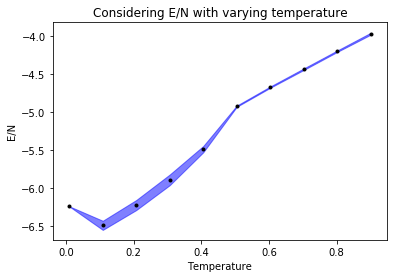

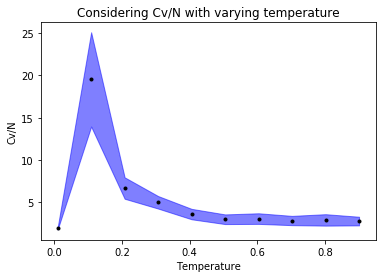

In [4]:
import matplotlib.pyplot as plt
Tset = np.arange(0.01, 1.0, 0.099)
X = Tset
E = np.array(EN43)
Eunc = np.array(EN43unc)
C = np.array(CN43)
Cunc = np.array(CN43unc)

plt.figure()
plt.title('Considering E/N with varying temperature')
plt.fill_between(X, (np.add(E,Eunc)), (np.subtract(E, Eunc)), alpha=0.5, color='blue')
plt.scatter(X, E, color='black', marker='.')
plt.ylabel('E/N')
plt.xlabel('Temperature')

plt.figure()
plt.title('Considering Cv/N with varying temperature')
plt.fill_between(X, (np.add(C,Cunc)), (np.subtract(C, Cunc)), alpha=0.5, color='blue')
plt.scatter(X, C, color='black', marker='.')
plt.ylabel('Cv/N')
plt.xlabel('Temperature')

As in question 2, the peak of the plot of Cv/N at varying temperature is lacking detail and so more data was collected below:

In [5]:
import numpy as np

with open("input.inp",'w') as input_file:
    input_file.write('{"velocities":true,"nc":5}')
%run initialize

Tset2 = np.append(np.arange(0.016, 0.03, 0.002), np.arange(0.03, 0.524, 0.084))
for i in Tset2:
    with open("run_input.inp",'w') as run_file:
        run_file.write('{ "nblock":15, "nstep":100, "temperature":'+str(i)+' }')
    %run mc_nvt_lj

initialize
Sets up initial configuration file for various simulations
Options for molecules are "atom", "linear", "nonlinear", "chain"
Particle mass m=1 throughout
Periodic boundaries
Atoms
nc                                                    5
n                                                   500
Velocities option selected
Periodic boundary conditions
Density                                        0.750000
Box length                                     8.735805
Close-packed fcc lattice positions
Temperature                                    1.000000
Velocities at temperature, inertia             1.000000       1.000000
Writing configuration to filename cnf.inp
mc_nvt_lj
Monte Carlo, constant-NVT ensemble
Simulation uses cut (but not shifted) potential
Lennard-Jones potential
Cut (but not shifted)
Diameter, sigma = 1
Well depth, epsilon = 1
Fast NumPy potential routine
Number of blocks                                     15  
Number of steps per block                           100 

             12        0.018600       -6.062751       -4.410024       -6.464326       -4.711205        0.052417      509.023743
             13        0.015360       -6.121386       -4.223051       -6.522961       -4.524233        0.049848      341.363224
             14        0.013480       -6.168983       -4.104339       -6.570558       -4.405520        0.050704      283.616435
             15        0.011780       -6.213783       -3.983948       -6.615358       -4.285129        0.046306      204.782429
-------------------------------------------------------------------------------------------------------------------------------
   Run averages        0.019747       -5.927401       -5.278714       -6.328976       -5.579896        0.030681      193.122340
     Run errors        0.001520        0.037154        0.206214        0.037154        0.206214        0.004921       48.548984

Run ends
Date:                                        2019/04/26
Time:                                 

              5        0.034520       -5.842481       -5.339796       -6.244056       -5.640977        0.042857      387.752963
              6        0.027600       -5.914276       -4.856916       -6.315851       -5.158097        0.052155      344.850071
              7        0.022160       -5.976206       -4.553263       -6.377781       -4.854445        0.051063      288.547548
              8        0.018500       -6.025852       -4.305683       -6.427427       -4.606865        0.051223      213.668132
              9        0.017180       -6.071331       -4.127288       -6.472905       -4.428469        0.051012      193.146691
             10        0.014620       -6.119202       -3.969710       -6.520776       -4.270892        0.049076      136.109495
             11        0.012600       -6.152584       -3.847815       -6.554159       -4.148996        0.047753       94.838207
             12        0.012520       -6.184317       -3.726205       -6.585892       -4.027387        0

              1        0.021380       -5.803659       -6.090137       -6.205234       -6.391318        0.008173       50.291535
              2        0.039580       -5.785650       -5.960250       -6.187224       -6.261431        0.016257        9.851469
              3        0.046640       -5.782348       -5.755254       -6.183923       -6.056435        0.026437       16.027438
              4        0.040140       -5.829773       -5.226382       -6.231348       -5.527564        0.045379      249.972673
              5        0.031820       -5.899800       -4.707107       -6.301375       -5.008288        0.055607      349.744916
              6        0.024040       -5.976571       -4.285096       -6.378146       -4.586277        0.056839      309.220265
              7        0.019160       -6.034526       -4.051057       -6.436101       -4.352238        0.054657      189.379771
              8        0.015240       -6.082463       -3.811458       -6.484037       -4.112639        0

              1        0.032780       -5.790232       -6.032002       -6.191807       -6.333183        0.012157       86.042106
              2        0.055720       -5.773238       -5.706409       -6.174813       -6.007590        0.030666       14.130523
              3        0.048860       -5.823061       -5.216239       -6.224636       -5.517420        0.046672      268.508516
              4        0.033980       -5.896435       -4.681780       -6.298010       -4.982961        0.055984      253.893385
              5        0.026300       -5.965771       -4.416805       -6.367346       -4.717986        0.050886      143.315474
              6        0.021860       -6.009850       -4.219077       -6.411425       -4.520258        0.048015       53.134794
              7        0.020200       -6.039293       -4.090108       -6.440868       -4.391289        0.048411       40.135432
              8        0.017720       -6.069243       -3.957397       -6.470818       -4.258578        0

              1        0.239360       -5.358974       -4.248176       -5.760549       -4.549357        0.187752       10.394259
              2        0.201960       -5.400360       -3.767710       -5.801935       -4.068892        0.205118       17.793185
              3        0.168280       -5.523554       -3.402171       -5.925129       -3.703352        0.204922       24.239699
              4        0.135300       -5.647396       -2.997500       -6.048971       -3.298681        0.199625       15.797952
              5        0.122520       -5.705957       -2.772131       -6.107532       -3.073312        0.205190        3.052471
              6        0.115780       -5.752890       -2.713068       -6.154465       -3.014249        0.194754        4.130390
              7        0.106860       -5.781013       -2.607563       -6.182588       -2.908744        0.202290        3.491006
              8        0.105320       -5.803831       -2.398564       -6.205406       -2.699745        0

              1        0.318480       -4.961707       -3.409472       -5.363281       -3.710653        0.340768        8.576979
              2        0.283100       -4.914852       -2.873048       -5.316427       -3.174229        0.368017        3.136494
              3        0.270380       -4.922316       -2.644837       -5.323891       -2.946019        0.360509        3.395618
              4        0.256980       -4.950124       -2.379481       -5.351699       -2.680662        0.367877        2.541471
              5        0.237440       -4.974069       -2.145198       -5.375644       -2.446379        0.361191        2.833855
              6        0.232280       -5.007600       -2.009263       -5.409175       -2.310444        0.377355        8.250549
              7        0.218860       -5.085776       -1.967492       -5.487351       -2.268673        0.365539        2.273012
              8        0.205360       -5.149912       -1.808849       -5.551487       -2.110030        0

In [4]:
import os, io, sys
from nbformat import read
import numpy as np

def read_notebook(fname):
    """display a short summary of the cells of a notebook"""
    with io.open(fname, 'r', encoding='utf-8') as f:
        nb = read(f, 4)
    return nb.cells
read = read_notebook('Assignment3-FinalCopy.ipynb')

results = np.array([])
resultsunc = np.array([])
for i in range(0, len(read[47].outputs)):
    sets = read[47].outputs[i].text.split('\n')
    resulti = [float(line.split('      ')[-4]) for line in sets if line[:15] == '   Run averages']
    resulti = np.array(resulti)
    results = np.append(results, resulti)
    
    resultiunc = [float(line.split('      ')[-4]) for line in sets if line[:15] == '     Run errors']
    resultiunc = np.array(resultiunc)
    resultsunc = np.append(resultsunc, resultiunc)
EN47 = results
EN47unc = resultsunc
print(EN47)
print(EN47unc)

resultsC = np.array([])
resultsuncC = np.array([])
for i in range(0, len(read[47].outputs)):
    sets = read[47].outputs[i].text.split('\n')
    resultiC = [float(line.split('      ')[-1]) for line in sets if line[:15] == '   Run averages']
    resultiC = np.array(resultiC)
    resultsC = np.append(resultsC, resultiC)
    
    resultiuncC = [float(line.split('      ')[-1]) for line in sets if line[:15] == '     Run errors']
    resultiuncC = np.array(resultiuncC)
    resultsuncC = np.append(resultsuncC, resultiuncC)
CN47 = resultsC
CN47unc = resultsuncC
print(CN47)
print(CN47unc)

[-6.219819 -6.328976 -6.345941 -6.415663 -6.423332 -6.432922 -6.534135
 -6.440654 -6.377129 -6.159836 -5.947627 -5.547365 -5.089295]
[0.003431 0.037154 0.0362   0.043838 0.04181  0.042548 0.058534 0.039363
 0.046247 0.049726 0.062711 0.044895 0.006354]
[ 35.092648 193.12234  121.853954 129.625331 108.456586  98.243979
 157.717592  72.900037  11.705847   7.396713   4.432435   3.750581
   3.017675]
[23.316809 48.548984 28.280574 31.663067 31.741991 29.246832 41.028693
 20.878431  3.343799  1.670849  0.765921  0.496268  0.479284]


X =  [0.01  0.016 0.018 0.02  0.022 0.024 0.026 0.028 0.03  0.109 0.114 0.198
 0.208 0.282 0.307 0.366 0.406 0.45  0.505 0.604 0.703 0.802 0.901]
E =  [-6.238163 -6.219819 -6.328976 -6.345941 -6.415663 -6.423332 -6.432922
 -6.534135 -6.440654 -6.487251 -6.377129 -6.159836 -6.221001 -5.947627
 -5.890483 -5.547365 -5.488263 -5.089295 -4.925138 -4.674981 -4.439883
 -4.203911 -3.974486]
C =  [  1.913488  35.092648 193.12234  121.853954 129.625331 108.456586
  98.243979 157.717592  72.900037  19.5371    11.705847   7.396713
   6.688279   4.432435   5.00054    3.750581   3.610005   3.017675
   2.998358   3.077185   2.846993   2.920106   2.782772]


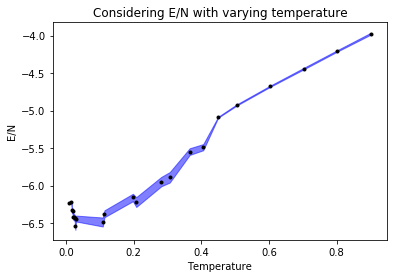

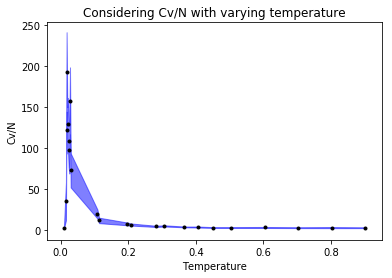

In [8]:
import matplotlib.pyplot as plt
Tset = np.arange(0.01, 1.0, 0.099)
Tset2 = np.append(np.arange(0.016, 0.03, 0.002), np.arange(0.03, 0.524, 0.084))

x1 = Tset
x2 = Tset2
X =np.append(x1, x2)

E1 = np.array(EN43)
Eunc1 = np.array(EN43unc)
C1 = np.array(CN43)
Cunc1 = np.array(CN43unc)

E2 = np.array(EN47)
Eunc2 = np.array(EN47unc)
C2 = np.array(CN47)
Cunc2 = np.array(CN47unc)

# Append with new results
E=np.append(E1, E2)
C=np.append(C1, C2)
Eunc=np.append(Eunc1, Eunc2)
Cunc=np.append(Cunc1, Cunc2)

Xind = np.argsort(X)
X=X[Xind]
E=E[Xind]
Eunc=Eunc[Xind]
C=C[Xind]
Cunc=Cunc[Xind]

plt.figure()
plt.title('Considering E/N with varying temperature')
plt.fill_between(X, (np.add(E, Eunc)), (np.subtract(E, Eunc)), alpha=0.5, color='blue')
plt.scatter(X, E, color='black', marker='.')
plt.ylabel('E/N')
plt.xlabel('Temperature')

plt.figure()
plt.title('Considering Cv/N with varying temperature')
plt.fill_between(X, (np.add(C,Cunc)), (np.subtract(C, Cunc)), alpha=0.5, color='blue')
plt.scatter(X, C, color='black', marker='.')
plt.ylabel('Cv/N')
plt.xlabel('Temperature')

print('X = ', X)
print('E = ', E)
print('C = ', C)

The peak plot comparing Cv/N vs. T above shows that the melting point sits at 0.018 with an uncertainty of 0.002. This is higher than it was when nc was 4 (the default value of nc) in question 2. 

## Question 5

How do we make the potential fit a particular type of atom? Use the parameters given in the assignment question.

The two melting points calculated for differently sized systems can be plotted compared with N^(-1/3) to find a linear trend. The y-intercept of this linear trend can be used to identify the melting point as N approaches infinity. Since two points is not much, I have calculated an extra point below whe nc=6.

In [4]:
import numpy as np

with open("input.inp",'w') as input_file:
    input_file.write('{"velocities":true,"nc":6}')

%run initialize

Tset = np.arange(0.01, 0.3, 0.05)
for i in Tset:
    with open("run_input.inp",'w') as run_file:
        run_file.write('{ "nblock":15, "nstep":100, "temperature":'+str(i)+' }')
    %run mc_nvt_lj

initialize
Sets up initial configuration file for various simulations
Options for molecules are "atom", "linear", "nonlinear", "chain"
Particle mass m=1 throughout
Periodic boundaries
Atoms
nc                                                    6
n                                                   864
Velocities option selected
Periodic boundary conditions
Density                                        0.750000
Box length                                    10.482966
Close-packed fcc lattice positions
Temperature                                    1.000000
Velocities at temperature, inertia             1.000000       1.000000
Writing configuration to filename cnf.inp
mc_nvt_lj
Monte Carlo, constant-NVT ensemble
Simulation uses cut (but not shifted) potential
Lennard-Jones potential
Cut (but not shifted)
Diameter, sigma = 1
Well depth, epsilon = 1
Fast NumPy potential routine
Number of blocks                                     15  
Number of steps per block                           100 

             12        0.020648       -6.169577       -2.663121       -6.571152       -2.964302        0.065152        3.283910
             13        0.019711       -6.178963       -2.611113       -6.580538       -2.912294        0.065617        5.756578
             14        0.020266       -6.190239       -2.538423       -6.591814       -2.839604        0.065385        3.180352
             15        0.019039       -6.201756       -2.503243       -6.603330       -2.804424        0.062653        3.190569
-------------------------------------------------------------------------------------------------------------------------------
   Run averages        0.035329       -6.048607       -3.256289       -6.450182       -3.557470        0.069641       53.582531
     Run errors        0.006050        0.039229        0.212957        0.039229        0.212957        0.001950       21.733576

Run ends
Date:                                        2019/04/29
Time:                                 

              5        0.097778       -5.769693       -2.877018       -6.171268       -3.178199        0.163805        8.628549
              6        0.090532       -5.806533       -2.661896       -6.208108       -2.963077        0.165438        4.671870
              7        0.084514       -5.846427       -2.565429       -6.248002       -2.866610        0.162453        7.127606
              8        0.080856       -5.879340       -2.510006       -6.280914       -2.811187        0.159620        2.685912
              9        0.081366       -5.903676       -2.520085       -6.305251       -2.821266        0.164123        3.199810
             10        0.080521       -5.927072       -2.485201       -6.328647       -2.786382        0.161651        3.535123
             11        0.078576       -5.942440       -2.438309       -6.344015       -2.739490        0.164301        2.850348
             12        0.076343       -5.966912       -2.407129       -6.368487       -2.708310        0

              1        0.280602       -5.208118       -3.949674       -5.609692       -4.250855        0.245195       16.270338
              2        0.241713       -5.218588       -3.459217       -5.620163       -3.760398        0.260776        5.506963
              3        0.214479       -5.279081       -3.154089       -5.680656       -3.455270        0.261208        6.648992
              4        0.192824       -5.348096       -2.866348       -5.749671       -3.167529        0.263268        4.878905
              5        0.175301       -5.415107       -2.645775       -5.816682       -2.946957        0.263045        6.863127
              6        0.160972       -5.503729       -2.458776       -5.905304       -2.759957        0.260353       11.389208
              7        0.143542       -5.598580       -2.298308       -6.000155       -2.599489        0.259196        8.117686
              8        0.137060       -5.667317       -2.159791       -6.068892       -2.460972        0

In [1]:
import os, io, sys
from nbformat import read
import numpy as np

def read_notebook(fname):
    """display a short summary of the cells of a notebook"""
    with io.open(fname, 'r', encoding='utf-8') as f:
        nb = read(f, 4)
    return nb.cells
read = read_notebook('Assignment3-FinalCopy.ipynb')

results = np.array([])
resultsunc = np.array([])
for i in range(0, len(read[54].outputs)):
    sets = read[54].outputs[i].text.split('\n')
    resulti = [float(line.split('      ')[-4]) for line in sets if line[:15] == '   Run averages']
    resulti = np.array(resulti)
    results = np.append(results, resulti)
    
    resultiunc = [float(line.split('      ')[-4]) for line in sets if line[:15] == '     Run errors']
    resultiunc = np.array(resultiunc)
    resultsunc = np.append(resultsunc, resultiunc)
EN54 = results
EN54unc = resultsunc
print(EN54)
print(EN54unc)

resultsC = np.array([])
resultsuncC = np.array([])
for i in range(0, len(read[54].outputs)):
    sets = read[54].outputs[i].text.split('\n')
    resultiC = [float(line.split('      ')[-1]) for line in sets if line[:15] == '   Run averages']
    resultiC = np.array(resultiC)
    resultsC = np.append(resultsC, resultiC)
    
    resultiuncC = [float(line.split('      ')[-1]) for line in sets if line[:15] == '     Run errors']
    resultiuncC = np.array(resultiuncC)
    resultsuncC = np.append(resultsuncC, resultiuncC)
CN54 = resultsC
CN54unc = resultsuncC
print(CN54)
print(CN54unc)

[-6.237462 -6.450182 -6.331347 -6.221946 -6.224439 -5.993059]
[0.000713 0.039229 0.039891 0.045771 0.063849 0.060468]
[ 2.312541 53.582531 17.217617 10.897652  9.946778  5.974194]
[ 0.251272 21.733576  5.614688  3.025199  2.260539  0.927428]


X =  [0.01 0.06 0.11 0.16 0.21 0.26]
E =  [-6.237462 -6.450182 -6.331347 -6.221946 -6.224439 -5.993059]
C =  [ 2.312541 53.582531 17.217617 10.897652  9.946778  5.974194]


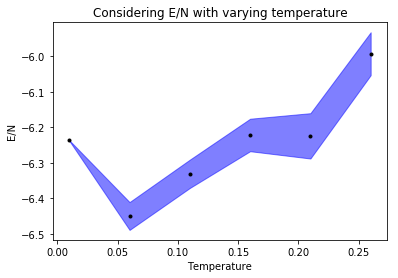

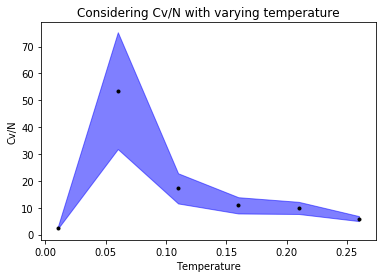

In [3]:
import matplotlib.pyplot as plt

Tset = np.arange(0.01, 0.3, 0.05)
X = Tset
E = np.array(EN54)
Eunc = np.array(EN54unc)
C = np.array(CN54)
Cunc = np.array(CN54unc)

plt.figure()
plt.title('Considering E/N with varying temperature')
plt.fill_between(X, (np.add(E,Eunc)), (np.subtract(E, Eunc)), alpha=0.5, color='blue')
plt.scatter(X, E, color='black', marker='.')
plt.ylabel('E/N')
plt.xlabel('Temperature')

plt.figure()
plt.title('Considering Cv/N with varying temperature')
plt.fill_between(X, (np.add(C,Cunc)), (np.subtract(C, Cunc)), alpha=0.5, color='blue')
plt.scatter(X, C, color='black', marker='.')
plt.ylabel('Cv/N')
plt.xlabel('Temperature')

print('X = ', X)
print('E = ', E)
print('C = ', C)

The plots above tell us that the melting temperature when nc is 6 is 0.06 with an uncertainty of 0.05. This data is fairly inaccurate and so further data collection has been carried out below in an attempt to decrease the associated error.

In [4]:
import numpy as np

with open("input.inp",'w') as input_file:
    input_file.write('{"velocities":true,"nc":6}')
%run initialize

Tset2 = np.arange(0.01, 0.11, 0.03)

for i in Tset2:
    with open("run_input.inp",'w') as run_file:
        run_file.write('{ "nblock":10, "nstep":80, "temperature":'+str(i)+' }')
    %run mc_nvt_lj

initialize
Sets up initial configuration file for various simulations
Options for molecules are "atom", "linear", "nonlinear", "chain"
Particle mass m=1 throughout
Periodic boundaries
Atoms
nc                                                    6
n                                                   864
Velocities option selected
Periodic boundary conditions
Density                                        0.750000
Box length                                    10.482966
Close-packed fcc lattice positions
Temperature                                    1.000000
Velocities at temperature, inertia             1.000000       1.000000
Writing configuration to filename cnf.inp
mc_nvt_lj
Monte Carlo, constant-NVT ensemble
Simulation uses cut (but not shifted) potential
Lennard-Jones potential
Cut (but not shifted)
Diameter, sigma = 1
Well depth, epsilon = 1
Fast NumPy potential routine
Number of blocks                                     10  
Number of steps per block                            80 

Program ends
mc_nvt_lj
Monte Carlo, constant-NVT ensemble
Simulation uses cut (but not shifted) potential
Lennard-Jones potential
Cut (but not shifted)
Diameter, sigma = 1
Well depth, epsilon = 1
Fast NumPy potential routine
Number of blocks                                     10  
Number of steps per block                            80  
Specified temperature                          0.070000
Potential cutoff distance                      2.500000
Maximum displacement                           0.150000
Number of particles                                 864  
Box length                                    10.482966
Density                                        0.750000
Initial values
E/N cut                                       -5.753403
P cut                                         -6.157051
E/N full                                      -6.154978
P full                                        -6.458232
T config                                       0.000000

Run begins
Date:         

In [9]:
import os, io, sys
from nbformat import read
import numpy as np

def read_notebook(fname):
    """display a short summary of the cells of a notebook"""
    with io.open(fname, 'r', encoding='utf-8') as f:
        nb = read(f, 4)
    return nb.cells
read = read_notebook('Assignment3-FinalCopy.ipynb')

results = np.array([])
resultsunc = np.array([])
for i in range(0, len(read[58].outputs)):
    sets = read[58].outputs[i].text.split('\n')
    resulti = [float(line.split('      ')[-4]) for line in sets if line[:15] == '   Run averages']
    resulti = np.array(resulti)
    results = np.append(results, resulti)
    
    resultiunc = [float(line.split('      ')[-4]) for line in sets if line[:15] == '     Run errors']
    resultiunc = np.array(resultiunc)
    resultsunc = np.append(resultsunc, resultiunc)
EN58 = results
EN58unc = resultsunc
print(EN58)
print(EN58unc)

resultsC = np.array([])
resultsuncC = np.array([])
for i in range(0, len(read[58].outputs)):
    sets = read[58].outputs[i].text.split('\n')
    resultiC = [float(line.split('      ')[-1]) for line in sets if line[:15] == '   Run averages']
    resultiC = np.array(resultiC)
    resultsC = np.append(resultsC, resultiC)
    
    resultiuncC = [float(line.split('      ')[-1]) for line in sets if line[:15] == '     Run errors']
    resultiuncC = np.array(resultiuncC)
    resultsuncC = np.append(resultsuncC, resultiuncC)
CN58 = resultsC
CN58unc = resultsuncC
print(CN58)
print(CN58unc)

[-6.239615 -6.351807 -6.293129]
[0.000687 0.038411 0.035894]
[  2.286534 108.943023  37.354037]
[ 0.304331 36.739341 11.433466]


X =  [0.01 0.01 0.04 0.06 0.07 0.11 0.16 0.21 0.26]
E =  [-6.237462 -6.239615 -6.351807 -6.450182 -6.293129 -6.331347 -6.221946
 -6.224439 -5.993059]
C =  [  2.312541   2.286534 108.943023  53.582531  37.354037  17.217617
  10.897652   9.946778   5.974194]


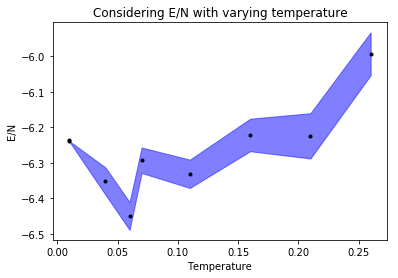

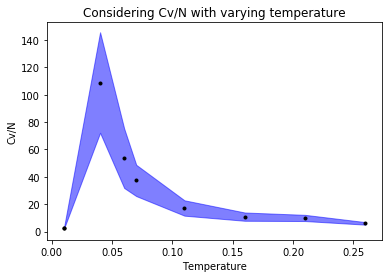

In [10]:
import matplotlib.pyplot as plt

x1 = Tset
x2 = np.delete(Tset2, -1)
X =np.append(x1, x2)

E1 = np.array(EN54)
Eunc1 = np.array(EN54unc)
C1 = np.array(CN54)
Cunc1 = np.array(CN54unc)

E2 = np.array(EN58)
Eunc2 = np.array(EN58unc)
C2 = np.array(CN58)
Cunc2 = np.array(CN58unc)

# Append with new results
E=np.append(E1, E2)
C=np.append(C1, C2)
Eunc=np.append(Eunc1, Eunc2)
Cunc=np.append(Cunc1, Cunc2)

Xind = np.argsort(X)
X=X[Xind]
E=E[Xind]
Eunc=Eunc[Xind]
C=C[Xind]
Cunc=Cunc[Xind]

plt.figure()
plt.title('Considering E/N with varying temperature')
plt.fill_between(X, (np.add(E, Eunc)), (np.subtract(E, Eunc)), alpha=0.5, color='blue')
plt.scatter(X, E, color='black', marker='.')
plt.ylabel('E/N')
plt.xlabel('Temperature')

plt.figure()
plt.title('Considering Cv/N with varying temperature')
plt.fill_between(X, (np.add(C,Cunc)), (np.subtract(C, Cunc)), alpha=0.5, color='blue')
plt.scatter(X, C, color='black', marker='.')
plt.ylabel('Cv/N')
plt.xlabel('Temperature')

print('X = ', X)
print('E = ', E)
print('C = ', C)

The plot above indicates that the melting temperature when nc = 6 is 0.04 with an uncertainty of 0.03.

The data collected for various melting temperatures including the value found immediately above and the values found in questions 2 and 4 has been plotted in the following input:

Trendline equation:  y = -0.42609186131777993 * x + 0.07984210526315791


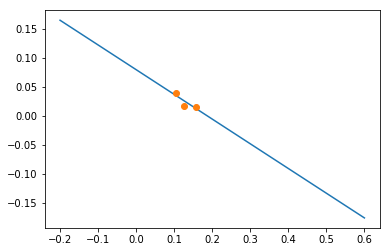

In [11]:
import matplotlib.pyplot as plt
import numpy as np

nc = np.array([4, 5, 6])
N = np.multiply(4, np.power(nc, 3))
Ncuberoot = np.power(N, (-1/3))
Tmelt = [0.016, 0.018, 0.04]

fit = np.polyfit(Ncuberoot, Tmelt, 1)
fitline= np.poly1d(fit)
slope, yint = fit
xp = np.linspace(-0.2, 0.6, 100)
print('Trendline equation: ','y =', slope, '* x', '+', yint)


plt.figure()
plt.plot(xp, fitline(xp), '-')
plt.plot(Ncuberoot, Tmelt, 'o')

The plot above compares melting temperature from systems with varying numbers of atoms. The y-intercept of this plot at 0.08
indicates the melting temperature of the system as the number of atoms approaches infinity. This can be used to find the melting temperature of various systems including argon, oxygen, xenon and zinc. This has been done by the following code:

In [12]:
import numpy as np
import pandas as pd

#defining the melting temperature of infinite atoms as calculated above in question 5
TmeltInf = 0.08

#defining the value of epsilon divided by boltzmann's constant for each scenario in the order provided in the assignment questions.
ekb = np.array([120, 118, 229, 62.4]) 
TmeltInf = np.multiply(TmeltInf, ekb)
TmeltInf = np.add(TmeltInf, -273.15)

systemnames = np.array(['Ar', 'O2', 'Xe', 'Zn'])
LitTmelt = np.array([-189.3442, -218.79, -111.75, 419.527]) # temperatures found in the handbook of chemistry and physics: Melting, Boiling, Triple and Critical Point Temperatures of the Elements (http://hbcponline.com.ezproxy.auckland.ac.nz/faces/documents/04_04/04_04_0001.xhtml), accessed on 29/04/19
Tmelt = np.array([TmeltInf, LitTmelt])

Titlerow = np.array(['system', 'melting temperature'])
Tmelt = np.transpose(Tmelt)
print(pd.DataFrame(Tmelt, systemnames, columns=['Theoretical Melting Temperature', 'Melting temperature in literature']))

    Theoretical Melting Temperature  Melting temperature in literature
Ar                         -263.550                          -189.3442
O2                         -263.710                          -218.7900
Xe                         -254.830                          -111.7500
Zn                         -268.158                           419.5270


The melting temperatures in literature were retrieved from the handbook of chemistry and physics: Melting, Boiling, Triple and Critical Point Temperatures of the Elements (http://hbcponline.com.ezproxy.auckland.ac.nz/faces/documents/04_04/04_04_0001.xhtml), on 29/04/19.

The values found above did not appear to match up with what literature suggests melting temperatures should be. This is most likely due to the low number of data points used to identify a linear trend increasing the inaccuracy of the identified value. For this reason, the following code was used to calculate what literature values would suggest that the lennard Jones melting temperature as N approaches infinity should be.

In [14]:
T = np.divide(np.add(LitTmelt, 273.15), ekb)
print(T)

[ 0.69838167  0.46067797  0.70480349 11.10059295]


Since Ar and Xe are both noble gases, they behave similarly to an ideal gas, these values are the ones which should match up closest to the Lennard Jones potential and so these values are the ones we will consider for estimating the Lennard Jones melting temperature as N approaches infinity. These values suggest that the melting temperature as N approaches infinity should sit at about 0.7. The code above has been re-run with this new value.

In [15]:
import numpy as np
import pandas as pd

#defining the melting temperature of infinite atoms as calculated above in question 5
TmeltInf = 0.7

#defining the value of epsilon divided by boltzmann's constant for each scenario in the order provided in the assignment questions.
ekb = np.array([120, 118, 229, 62.4]) 
TmeltInf = np.multiply(TmeltInf, ekb)
TmeltInf = np.add(TmeltInf, -273.15)

systemnames = np.array(['Ar', 'O2', 'Xe', 'Zn'])
LitTmelt = np.array([-189.3442, -218.79, -111.75, 419.527]) # temperatures found in the handbook of chemistry and physics: Melting, Boiling, Triple and Critical Point Temperatures of the Elements (http://hbcponline.com.ezproxy.auckland.ac.nz/faces/documents/04_04/04_04_0001.xhtml), accessed on 29/04/19
Tmelt = np.array([TmeltInf, LitTmelt])

Titlerow = np.array(['system', 'melting temperature'])
Tmelt = np.transpose(Tmelt)
print(pd.DataFrame(Tmelt, systemnames, columns=['Theoretical Melting Temperature', 'Melting temperature in literature']))

    Theoretical Melting Temperature  Melting temperature in literature
Ar                          -189.15                          -189.3442
O2                          -190.55                          -218.7900
Xe                          -112.85                          -111.7500
Zn                          -229.47                           419.5270


By re-running the code above to compare theoretical values to literature values for melting temperatures with this new value, it can be seen that the melting temperatures for Ar and Xe do roughly match up while the melting temperatures for O2 and Zn don't match up so well. This is because O2 is a diatomic molecule and Zn is metallic and so both don't behave ideally and should deviate from what is expected with a Lennard Jones model.